<a href="https://colab.research.google.com/github/yashvi000/ML-Tutorial/blob/main/Unsupervised%20Learning%20Models/Unsupervised_%5Bseeds_dataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv('seeds_dataset.txt', names=cols, sep='\s+')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3535253669.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('seeds_dataset.txt', names=cols, sep='\s+')


In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df["class"].unique()

array([1, 2, 3])

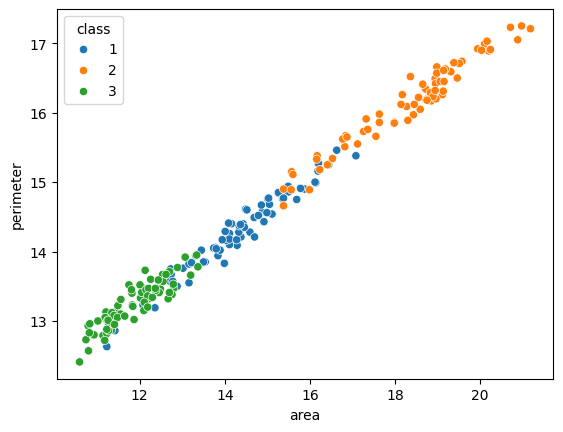

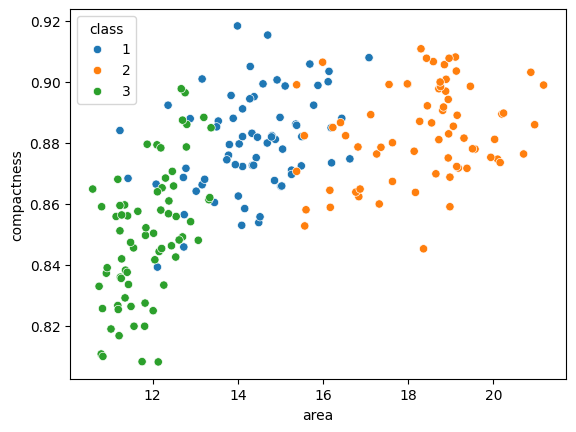

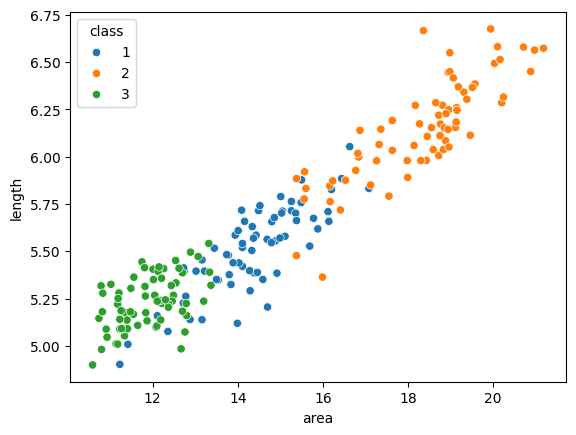

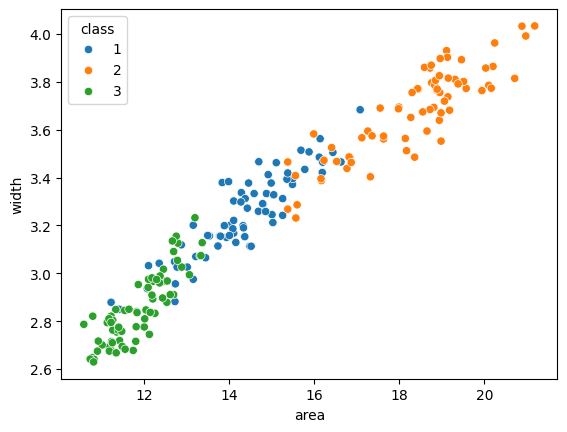

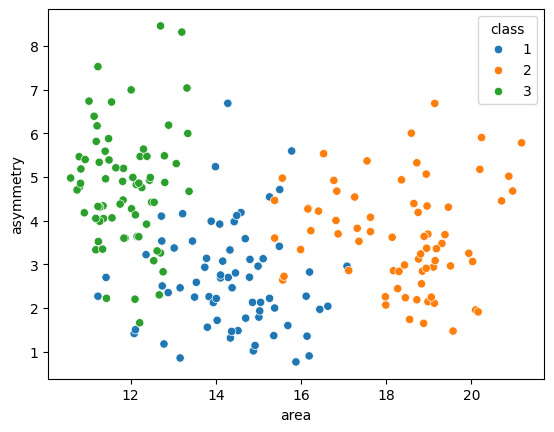

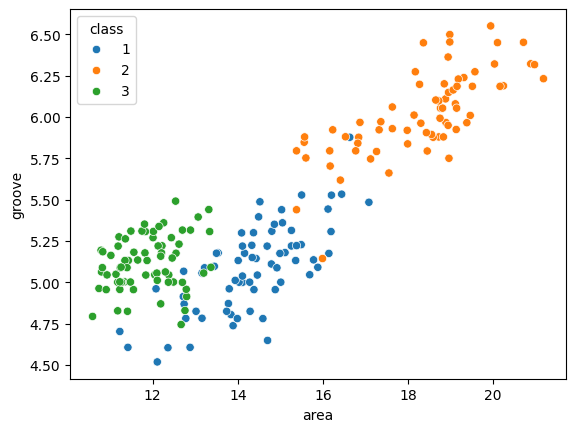

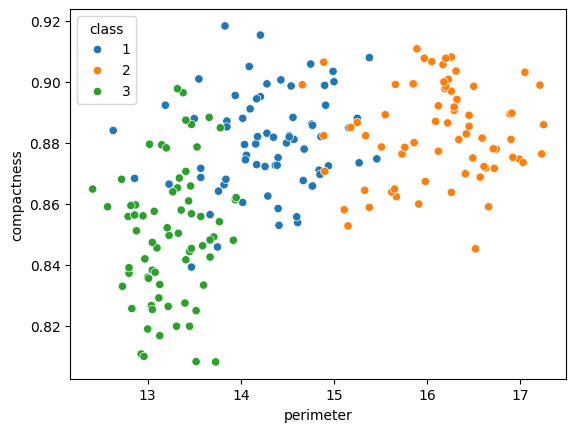

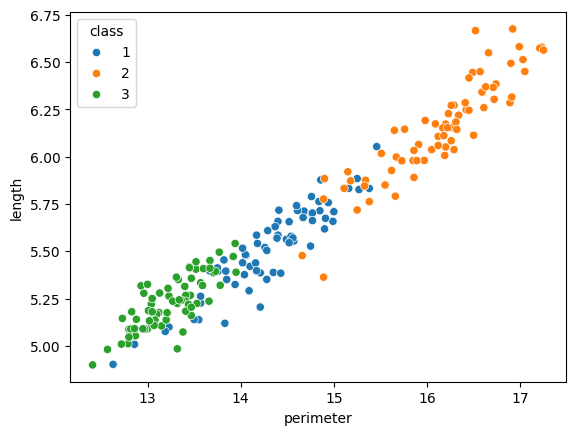

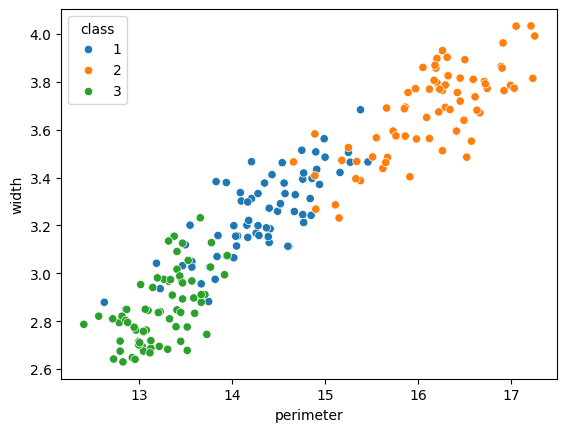

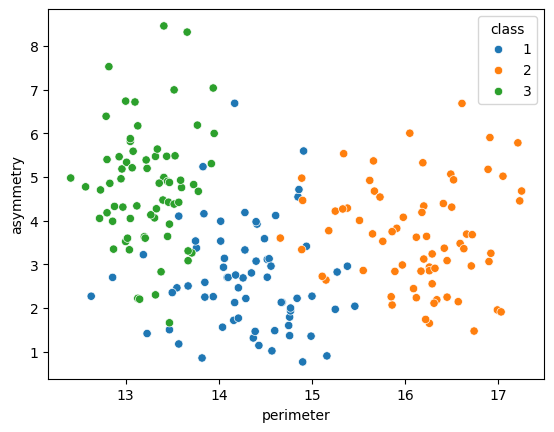

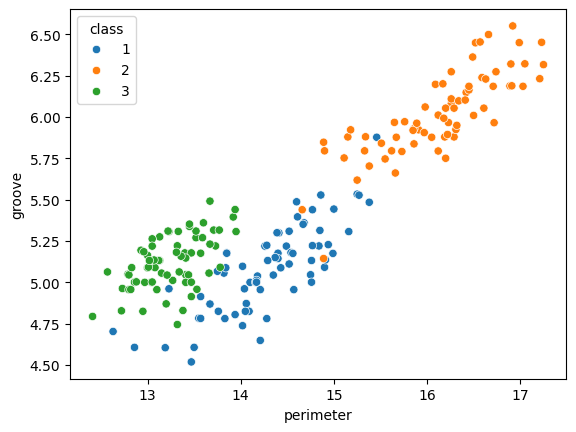

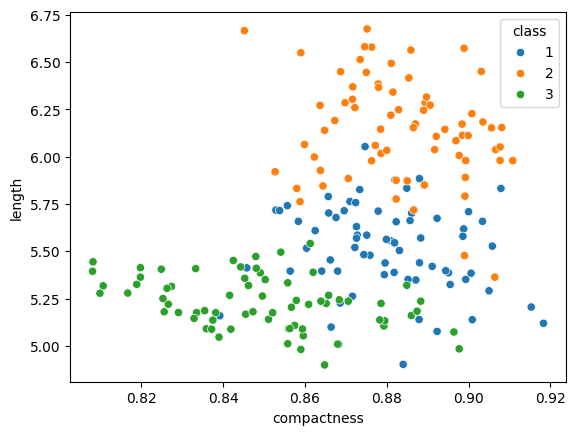

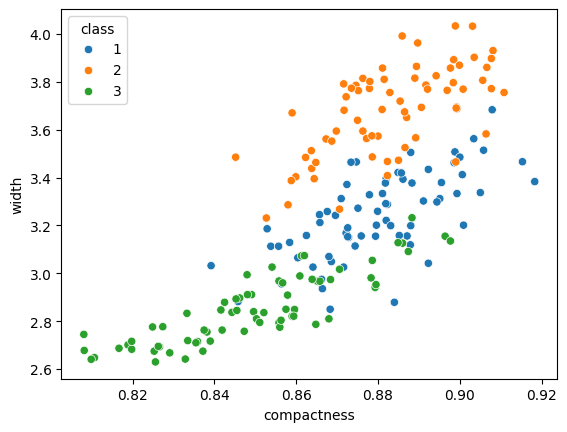

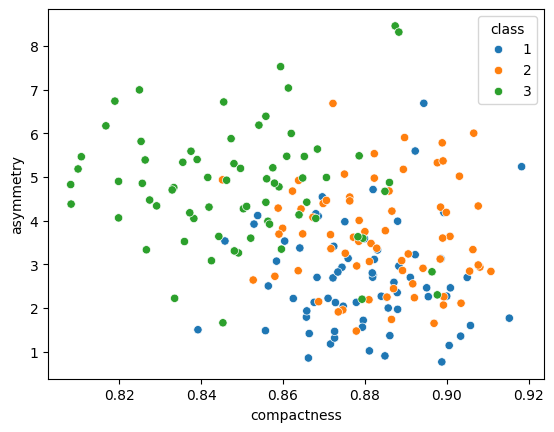

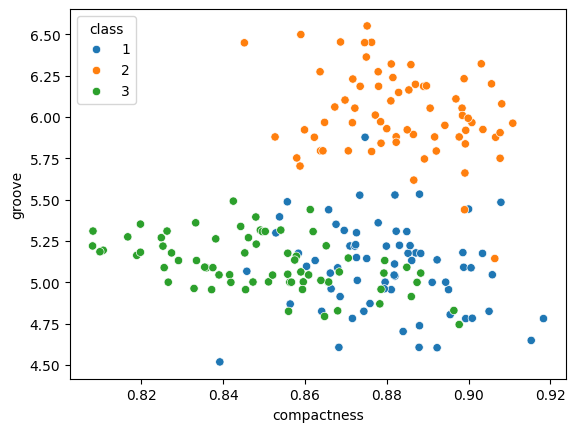

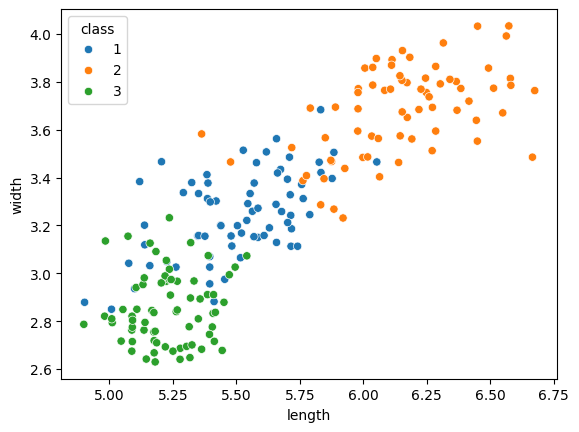

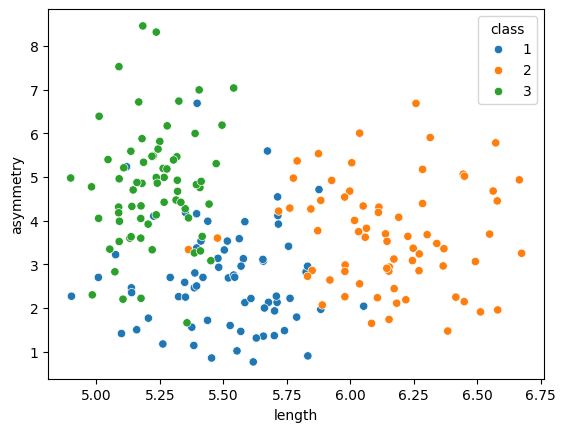

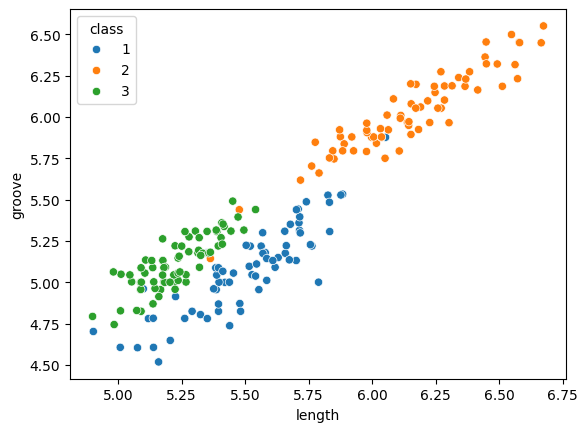

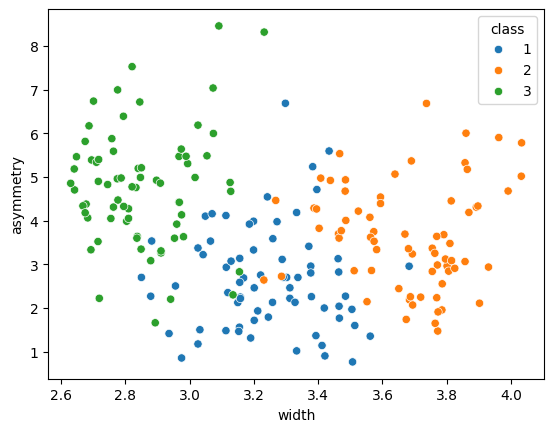

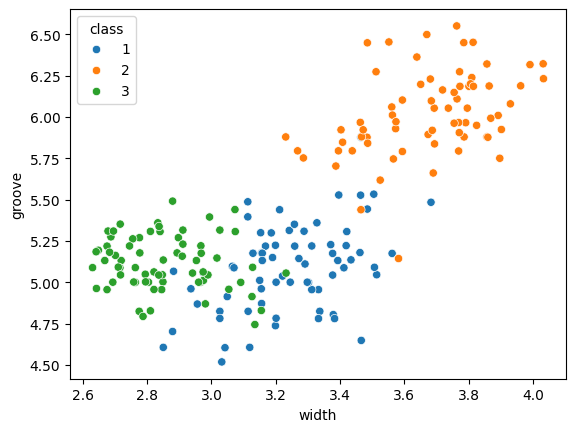

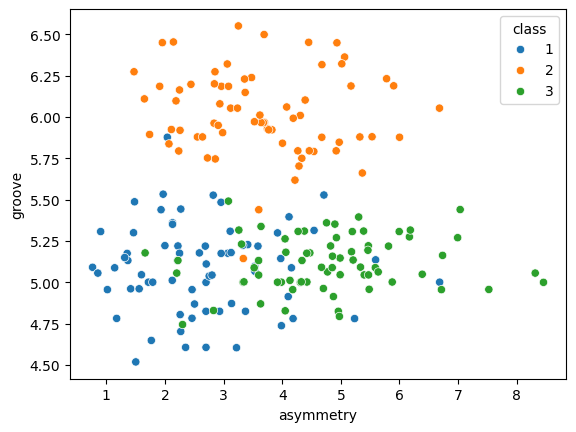

In [5]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class', palette='tab10')
    plt.show()

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = "compactness"
y = "asymmetry"
X = df[[x, y]].values

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

In [9]:
cluster1 = kmeans.labels_

In [10]:
mapping1 = np.array([3, 2, 1])
cluster1 = mapping1[cluster1]
cluster1_df = pd.DataFrame(np.hstack((X, cluster1.reshape(-1, 1))), columns=[x, y, "class"])

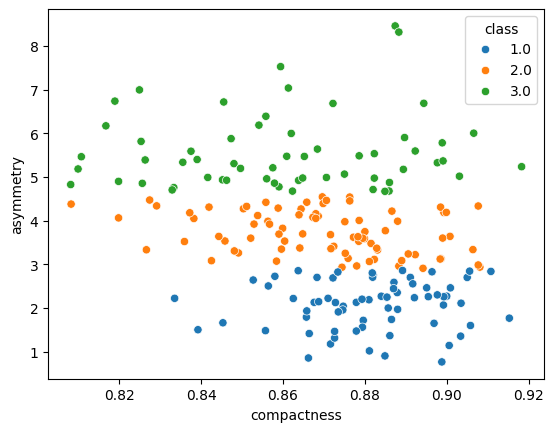

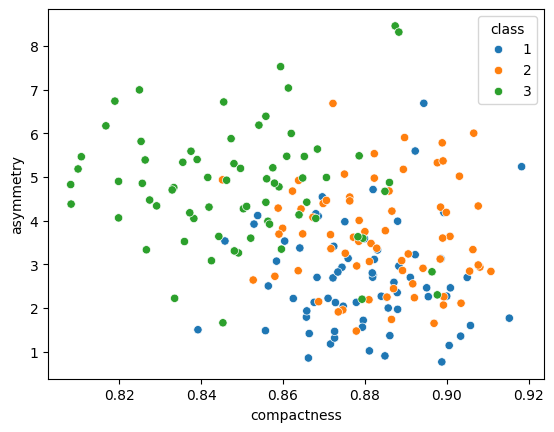

In [11]:
# KMeans classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster1_df, palette="tab10")
plt.show()

# Original
sns.scatterplot(x=x, y=y, hue="class", data=df, palette="tab10")
plt.show()

#Higher Dimensions

In [12]:
X = df[cols[:-1]].values

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

In [14]:
mapping2 = np.array([2, 3, 1])
cluster2 = mapping2[kmeans.labels_]
cluster2_df = pd.DataFrame(np.hstack((X, cluster2.reshape(-1, 1))), columns=df.columns)

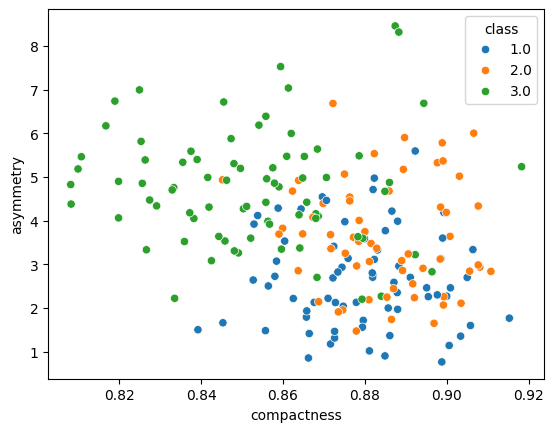

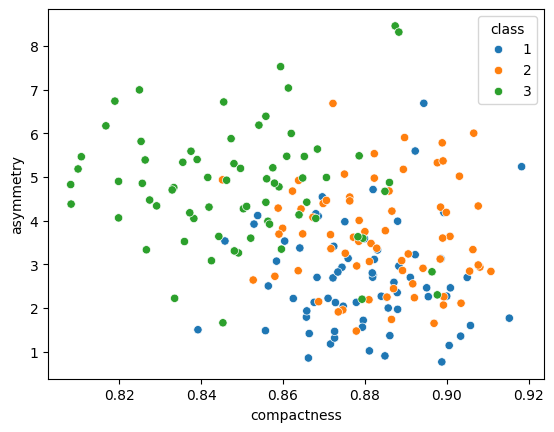

In [15]:
# KMeans classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster2_df, palette="tab10")
plt.show()

# Original classes
sns.scatterplot(x=x, y=y, hue="class", data=df, palette="tab10")
plt.show()

#PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [18]:
print(X.shape)
print(transformed_x.shape)

(210, 7)
(210, 2)


In [19]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

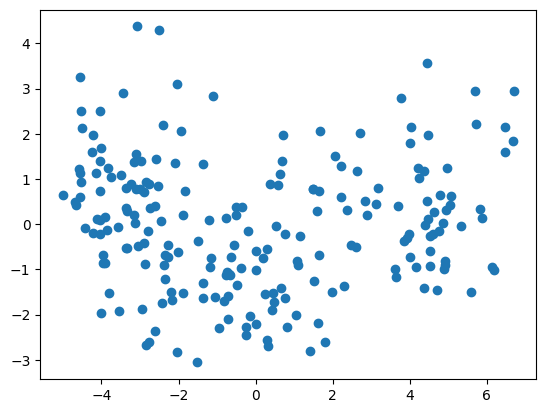

In [20]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [21]:
mapping3 = np.array([2, 3, 1])
cluster3 = mapping3[kmeans.labels_]
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, cluster3.reshape(-1,1))), columns=["pca1", "pca2", "class"])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1,1))), columns=["pca1", "pca2", "class"])

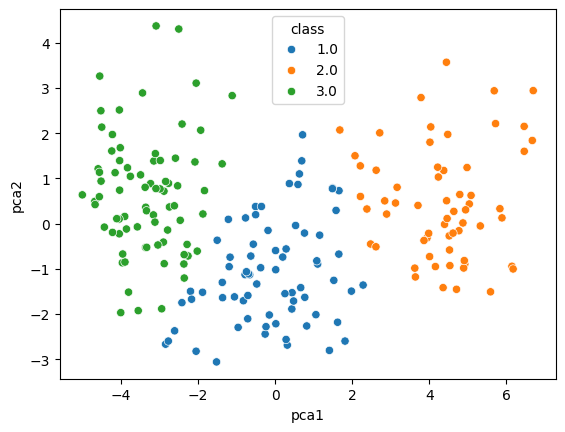

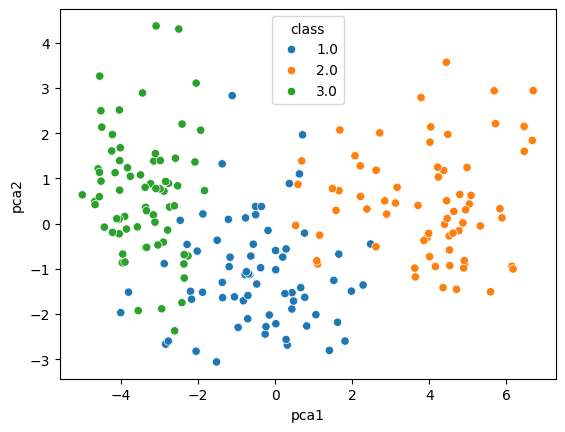

In [22]:
# KMeans classes
sns.scatterplot(x="pca1", y="pca2", hue="class", data=kmeans_pca_df, palette="tab10")
plt.show()

# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue="class", data=truth_pca_df, palette="tab10")
plt.show()